# Install/Import necessary libararies

In [ ]:
!pip install easyocr

import easyocr
import cv2
from google.colab import drive, files
from matplotlib import pyplot as plt
from pathlib import Path
import numpy as np

drive.mount('/content/gdrive')


# Upload all screenshots

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving ikun_1.png to ikun_1.png
User uploaded file "ikun_1.png" with length 2541050 bytes


# Set gloabal variables

In [ ]:
# Change the name here to your participant.
# The name here will be used as folder name in google drive.
# E.g. My Drive/Game/Arknights/ayk1117
gamer_name = 'test_name'
# Enter screenshot name here.
image_file_name = 'ss2.png'

# Place hodler index, used to lable images when OCR fails to detect operator name.
placeholder = 0
operator_names = ["能天使", "空弦", "灰烬", "黑", "鸿雪", "远牙", "W", "菲亚梅塔", "早露", "提丰", "迷迭香", "假日威龙陈", "推进之王", "风笛", "嵯峨", "琴柳", "焰尾", "伺夜", "缪尔赛思", "伊内丝", "伊芙利特", "莫斯提马", "艾雅法拉", "刻俄柏", "霍尔海雅", "夕", "异客", "卡涅利安", "林", "澄闪", "黑键", "灵知", "安洁莉娜", "铃兰", "麦哲伦", "浊心斯卡蒂", "淬羽赫默", "令", "白铁", "塑心", "傀影", "缄默德克萨斯", "麒麟R夜刀", "老鲤", "琳琅诗怀雅", "温蒂", "阿", "歌蕾蒂娅", "水月", "归溟幽灵鲨", "多萝西", "闪灵", "夜莺", "凯尔希", "流明", "纯烬艾雅法拉", "焰影苇草", "星熊", "塞雷娅", "瑕光", "年", "泥岩", "斥罪", "森蚺", "号角", "涤火杰西卡", "山", "重岳", "银灰", "棘刺", "仇白", "赫德雷", "陈", "艾丽妮", "煌", "百炼嘉维尔", "史尔特尔", "薇薇安娜", "赫拉格", "帕拉斯", "耀骑士临光", "止颂", "圣约送葬人", "玛恩纳", "斯卡蒂"]

# Segment the orginal screenshot (and display with rectangles)

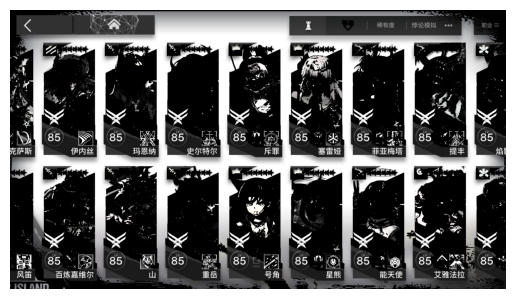

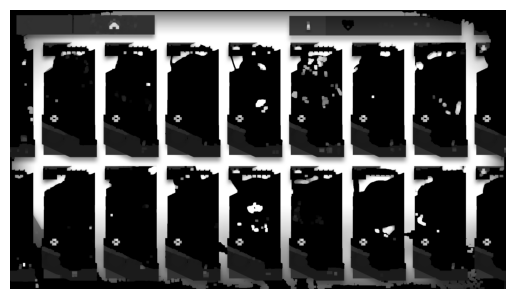

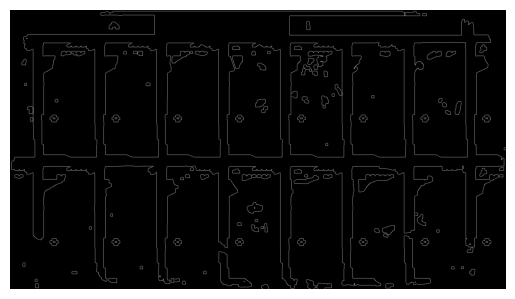

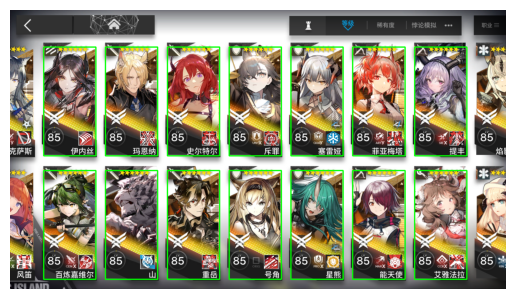

In [ ]:

# Read the input image
img = cv2.imread(image_file_name)

# Change all colorful pixels to near black.
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# define range wanted color in HSV
lower_val = np.array([0,0,0]) #full black RGB = 0,0,0
upper_val = np.array([179,15,255]) # all hue, all value, cap saturation at 15

# Threshold the HSV image to get only grayish colors
mask = cv2.inRange(hsv, lower_val, upper_val)

# apply mask to image
res = cv2.bitwise_and(img,img,mask=mask)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


# Convert the image to grayscale
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
# plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
# plt.axis("off")
# plt.show()

# Smooth
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(gray,kernel,iterations = 2)
dilate = cv2.dilate(erosion,kernel,iterations = 2)
plt.imshow(cv2.cvtColor(dilate, cv2.COLOR_GRAY2RGB))
plt.axis("off")
plt.show()

# Covnert to balck white
ret,thresh = cv2.threshold(dilate, 80, 255, cv2.THRESH_BINARY)
# plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
# plt.axis("off")
# plt.show()


# Apply the Canny edge detector
edges = cv2.Canny(thresh, 50, 150, apertureSize=3)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB))
plt.axis("off")
plt.show()

lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=70, maxLineGap=6)

x_points = [0]
y_points = [0]
for line in lines:
  l = line[0]
  if np.abs(l[0] - l[2]) < 8:
    x_points.append(l[0])
    # cv2.line(img, (l[0], -3000), (l[0], 3000), (0,0,255), 3, cv2.LINE_AA)
    continue
  if np.abs(l[1] - l[3]) < 8:
    y_points.append(l[1])
    # cv2.line(img, (-3000, l[1]), (3000, l[1]), (0,0,255), 3, cv2.LINE_AA)
    continue
h, w, _ = img.shape
x_points.append(w)
y_points.append(h)
x_points.sort()
y_points.sort()

i = 0
j = 0
min_card_w = int(h / 6)
min_card_h = int(h / 3)
valid_x_indices = []
valid_y_indices = []
for i in range(len(x_points) - 1):
  if x_points[i + 1] - x_points[i] > min_card_w - 40:
    valid_x_indices.append(i)
for i in range(len(y_points) - 1):
  if y_points[i + 1] - y_points[i] > min_card_h - 40:
    valid_y_indices.append(i)

rects = []
for x in valid_x_indices:
  for y in valid_y_indices:
    p1 = [x_points[x], y_points[y]]
    p2 = [x_points[x + 1] + 4, y_points[y + 1] + 4]
    rects.append([p1, p2])

img_to_show = img.copy()
for rect in rects:
  img_to_show = cv2.rectangle(img_to_show,rect[0], rect[1],(0,255,0),3)
plt.imshow(cv2.cvtColor(img_to_show, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

cards = []
for rect in rects:
  chopped = img[rect[0][1]:rect[1][1], rect[0][0]:rect[1][0]]
  resized = cv2.resize(chopped, (180, 380), interpolation=cv2.INTER_LINEAR)
  cards.append(resized)



# Chop the images and save operator cards as {OPERATOR_NAME}.jpg
If the name detected by OCR is not in the operator name list, we will save it as placehoderX.jpg, in which X is the current value of {place_holder} int.


伊内丝


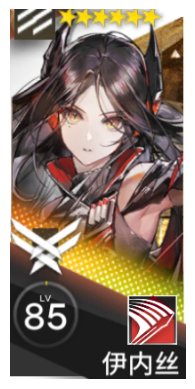


百炼嘉维尔


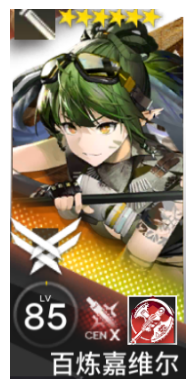


玛恩纳


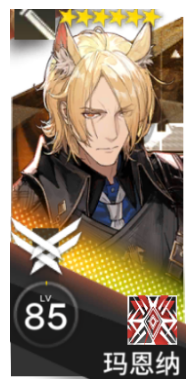


placeholder3


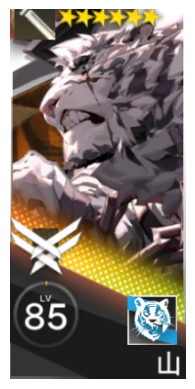


史尔特尔


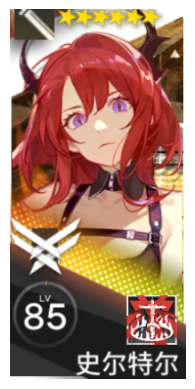


重岳


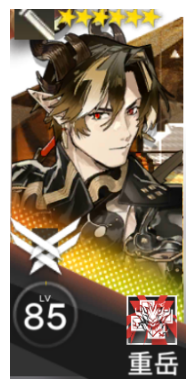


斥罪


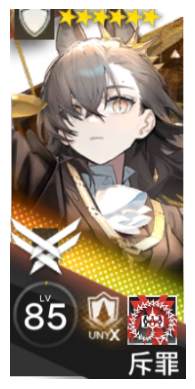


号角


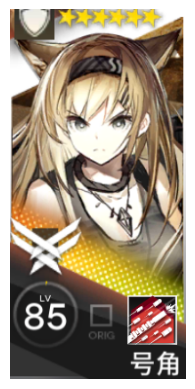


塞雷娅


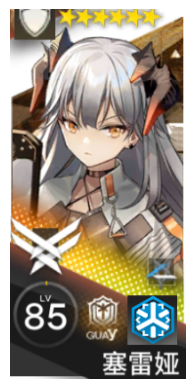


星熊


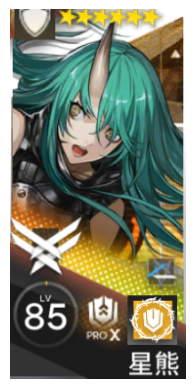


菲亚梅塔


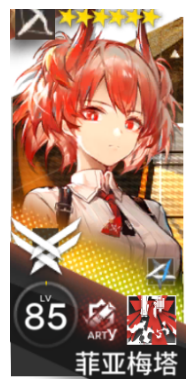


placeholder4


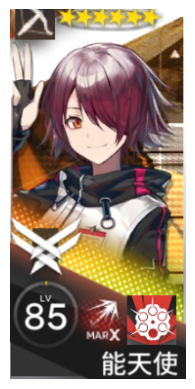


提丰


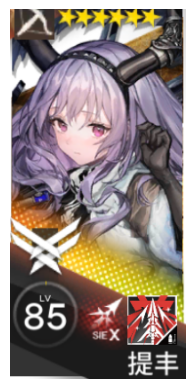


艾雅法拉


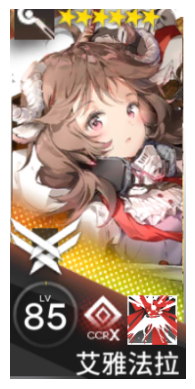

In [ ]:
root_path = '/content/gdrive/MyDrive/Game/Arknights/' + gamer_name + '/'
Path(root_path).mkdir(parents=True, exist_ok=True)

# Since chinese is not compatible with French, is it creating as a standalone model
reader_ch = easyocr.Reader(['ch_sim'])

for card in cards:
  print()
  ocr_results = reader_ch.readtext(card, detail=0)
  name = ocr_results[-1] if len(ocr_results) > 0 else None
  if not name or name not in operator_names:
    name = 'placeholder' + str(placeholder)
    placeholder += 1
  print(name)
  cv2.imwrite(root_path + name + ".jpg", card)
  plt.imshow(cv2.cvtColor(card, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.show()
